# Pandas란?
- Pandas는 파이썬에서 사용하는 데이터 분석 라이브러리로, 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구

In [2]:
# 라이브러리 불러오기
import pandas as pd

# Pandas 자료구조
- Pandas는 Series와 DataFrame 형태의 자료구조를 사용
- 이외의 파이썬에서 활용하는 자료구조형태는 아래의 링크에서 확인
- https://wikidocs.net/21813

In [6]:
# 시리즈 클래스는 1차원 배열의 값에 각 값에 대응되는 인덱스를 부여할 수 있는 구조임
sr = pd.Series([25000, 9000, 10000, 5000],
               index=["삼계탕", "제육볶음", "냉면", "소주"])
print(sr)

삼계탕     25000
제육볶음     9000
냉면      10000
소주       5000
dtype: int64


In [8]:
# 값과 인덱스를 출력함
print('시리즈의 인덱스 : {}'.format(sr.index))
print('시리즈의 값 : {}'.format(sr.values))

시리즈의 인덱스 : Index(['삼계탕', '제육볶음', '냉면', '소주'], dtype='object')
시리즈의 값 : [25000  9000 10000  5000]


In [10]:
# 데이터프레임은 2차원 리스트를 매개변수로 전달함
# 행과 열을 가짐(행방향, 열방향 인덱스를 가짐)
values = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
index = ['one', 'two', 'three']
columns = ['A', 'B', 'C']

df = pd.DataFrame(values, index=index, columns=columns)
df

,A,B,C
one,1,2,3
two,4,5,6
three,7,8,9


In [11]:
print('데이터프레임의 인덱스 : {}'.format(df.index))
print('데이터프레임의 열이름: {}'.format(df.columns))

데이터프레임의 인덱스 : Index(['one', 'two', 'three'], dtype='object')
데이터프레임의 열이름: Index(['A', 'B', 'C'], dtype='object')


In [12]:
# 데이터프레임의 값
print(df.values)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Tidy data(깔끔한 데이터)

- 정의 : 밑바닥 부터 시작할 필요 없는 데이터

- Tidy data의 특징
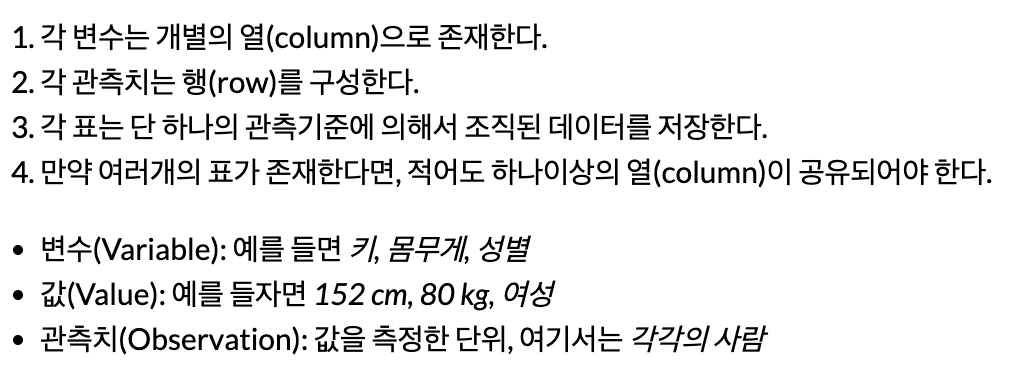

# 데이터 생성하기

## 딕셔너리를 통해 데이터프레임 생성하기

In [18]:
data = {
    '학번' : ['1000', '1001', '1002', '1003', '1004', '1005'],
    '이름' : [ 'Steve', 'James', 'Doyeon', 'Jane', 'Pilwoong', 'Tony'],
    '점수': [90.72, 78.09, 98.43, 64.19, 81.30, 99.14]
    }

df = pd.DataFrame(data)
df

,학번,이름,점수
0,1000,Steve,90.72
1,1001,James,78.09
2,1002,Doyeon,98.43
3,1003,Jane,64.19
4,1004,Pilwoong,81.30
5,1005,Tony,99.14


## 이중 리스트로 데이터프레임 생성하기

In [20]:
data = [
    ['1000', 'Steve', 90.72], 
    ['1001', 'James', 78.09], 
    ['1002', 'Doyeon', 98.43], 
    ['1003', 'Jane', 64.19], 
    ['1004', 'Pilwoong', 81.30],
    ['1005', 'Tony', 99.14]
]

print("data의 type : ", type(data))
df = pd.DataFrame(data)
print("df의 type : ", type(df))
df

data의 type :  <class 'list'>
df의 type :  <class 'pandas.core.frame.DataFrame'>


,0,1,2
0,1000,Steve,90.72
1,1001,James,78.09
2,1002,Doyeon,98.43
3,1003,Jane,64.19
4,1004,Pilwoong,81.30
5,1005,Tony,99.14


In [21]:
# 데이터프레임의 열 이름 지정하기
df = pd.DataFrame(data, columns=['학번', '이름', '점수'])
df

,학번,이름,점수
0,1000,Steve,90.72
1,1001,James,78.09
2,1002,Doyeon,98.43
3,1003,Jane,64.19
4,1004,Pilwoong,81.30
5,1005,Tony,99.14


# 데이터 조회하기

In [26]:
print("데이터 형태 : ", df.shape)

데이터 형태 :  (6, 3)


## subset

### 행을 기준으로 조회

In [34]:
df[df["점수"] > 70]

,학번,이름,점수
0,1000,Steve,90.72
1,1001,James,78.09
2,1002,Doyeon,98.43
4,1004,Pilwoong,81.30
5,1005,Tony,99.14


In [38]:
df.sample(n = 3)

,학번,이름,점수
4,1004,Pilwoong,81.30
0,1000,Steve,90.72
1,1001,James,78.09


In [22]:
df.head(10)

,학번,이름,점수
0,1000,Steve,90.72
1,1001,James,78.09
2,1002,Doyeon,98.43


In [23]:
df.tail(3)

,학번,이름,점수
3,1003,Jane,64.19
4,1004,Pilwoong,81.30
5,1005,Tony,99.14


In [41]:
df.nlargest(1, '점수')

,학번,이름,점수
5,1005,Tony,99.14


In [42]:
df.nsmallest(1, '점수')

,학번,이름,점수
3,1003,Jane,64.19


### 열을 기준으로 조회

In [27]:
# 대괄호를 한번 쓰면 시리즈 형태
df["이름"]

0       Steve
1       James
2      Doyeon
3        Jane
4    Pilwoong
5        Tony
Name: 이름, dtype: object

In [28]:
# 대괄호를 두번 쓰면 데이터프레임 형태
df[["이름", "점수"]]

,이름,점수
0,Steve,90.72
1,James,78.09
2,Doyeon,98.43
3,Jane,64.19
4,Pilwoong,81.30
5,Tony,99.14


In [47]:
# 정규식은 특정 패턴을 표현하는 문자열의 집합을 매칭
df.filter(regex = "점수")

,점수
0,90.72
1,78.09
2,98.43
3,64.19
4,81.30
5,99.14


# 데이터 읽기

In [57]:
nadri_call = pd.read_csv('/Users/kanovatio/Gangmin Jeong/hands-on data/random_nadri.csv', encoding = 'cp949')
print("데이터 형태 : ", nadri_call.shape)
nadri_call.head(3)

데이터 형태 :  (1000, 17)


,접수시간,목적지분류,질환분류,장애정도,휠체어 유무,출발지 위도,출발지 경도,목적지 위도,목적지 경도,배차시간(초),고객 승차시간,고객 하차시간,출발지 행정동,목적지 행정동,배차구분,배차 차량종류,배차 차량번호
0,2020.1.8 9:35,의료시설,뇌병변,중증,유,35.856699,128.574363,35.843589,128.567858,740,2020.1.8 9:47,2020.1.8 9:55,대명3동,대명4동,배차,특장차량,NCID0218
1,2020.10.23 15:50,기타,신장,중증,무,35.943736,128.558035,35.913127,128.528137,2035,2020.10.23 16:24,2020.10.23 16:46,동천동,관문동,배차,개인택시,NCID0092
2,2020.1.22 17:53,집,뇌병변,경증,무,35.878704,128.579262,35.868865,128.687854,3966,2020.1.22 18:59,2020.1.22 19:38,성내3동,안심1동,배차,개인택시,NCID0285


## loc와 iloc

loc는 location의 약어로, 데이터프레임의 행 또는 칼럼의 label이나 boolean array로 인덱싱하는 방법

In [69]:
# 하나의 값만 입력할 경우 하나의 행만 뽑아옴
nadri_call.loc[0] # 인덱스 이름이 0인 행만 출력

접수시간       2020.1.8 9:35
목적지분류               의료시설
질환분류                 뇌병변
장애정도                  중증
휠체어 유무                 유
출발지 위도         35.856699
출발지 경도        128.574363
목적지 위도         35.843589
목적지 경도        128.567858
배차시간(초)              740
고객 승차시간    2020.1.8 9:47
고객 하차시간    2020.1.8 9:55
출발지 행정동             대명3동
목적지 행정동             대명4동
배차구분                  배차
배차 차량종류             특장차량
배차 차량번호         NCID0218
Name: 0, dtype: object

In [168]:
# loc는 인덱스 값 기반으로 데이터를 추출함
nadri_call.loc[2,"장애정도"]

'경증'

In [76]:
# 슬라이싱
nadri_call.loc[:,:]

,접수시간,목적지분류,질환분류,장애정도,휠체어 유무,출발지 위도,출발지 경도,목적지 위도,목적지 경도,배차시간(초),고객 승차시간,고객 하차시간,출발지 행정동,목적지 행정동,배차구분,배차 차량종류,배차 차량번호
0,2020.1.8 9:35,의료시설,뇌병변,중증,유,35.856699,128.574363,35.843589,128.567858,740,2020.1.8 9:47,2020.1.8 9:55,대명3동,대명4동,배차,특장차량,NCID0218
1,2020.10.23 15:50,기타,신장,중증,무,35.943736,128.558035,35.913127,128.528137,2035,2020.10.23 16:24,2020.10.23 16:46,동천동,관문동,배차,개인택시,NCID0092
2,2020.1.22 17:53,집,뇌병변,경증,무,35.878704,128.579262,35.868865,128.687854,3966,2020.1.22 18:59,2020.1.22 19:38,성내3동,안심1동,배차,개인택시,NCID0285
3,2018.10.14 8:30,여가시설,지적,중증,무,35.887073,128.561291,35.846483,128.561945,1219,2018.10.14 8:50,2018.10.14 9:04,비산7동,성당동,배차,개인택시,NCID0086
4,2019.6.2 20:24,의료시설,정신,중증,무,35.842825,128.632202,35.876174,128.644040,582,2019.6.2 20:34,2019.6.2 20:46,황금1동,효목2동,배차,특장차량,NCID0349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020.12.25 16:15,금융시설,지체,경증,무,35.850775,128.589786,35.874776,128.629068,706,2020.12.25 16:27,2020.12.25 16:43,대명2동,신천4동,배차,개인택시,NCID0130
996,2020.1.21 11:10,집,지체,중증,무,35.866512,128.604220,35.868675,128.614901,1817,2020.1.21 11:40,2020.1.21 11:48,삼덕동,신천1.2동,배차,특장차량,NCID0365
997,2020.9.8 15:13,집,청각,중증,무,35.853185,128.525037,35.800062,128.530826,2769,2020.9.8 15:59,2020.9.8 16:28,용산1동,진천동,배차,개인택시,NCID0077
998,2018.10.21 10:36,교통시설,시각,중증,무,35.930111,128.555423,35.884117,128.555278,2788,2018.10.21 11:22,2018.10.21 11:32,구암동,비산7동,배차,개인택시,NCID0071


In [73]:
# "장애정도" 컬럼만 출력하기
nadri_call.loc[:,"장애정도"]

0      중증
1      중증
2      경증
3      중증
4      중증
       ..
995    경증
996    중증
997    중증
998    중증
999    중증
Name: 장애정도, Length: 1000, dtype: object

In [77]:
nadri_call.loc[:5,:"장애정도"]

,접수시간,목적지분류,질환분류,장애정도
0,2020.1.8 9:35,의료시설,뇌병변,중증
1,2020.10.23 15:50,기타,신장,중증
2,2020.1.22 17:53,집,뇌병변,경증
3,2018.10.14 8:30,여가시설,지적,중증
4,2019.6.2 20:24,의료시설,정신,중증
5,2018.4.12 10:45,교통시설,청각,중증


In [87]:
# 부울린으로 특정 값 추출하기
yeoga = nadri_call.loc[nadri_call['목적지분류'] == "여가시설"]
yeoga.head()

,접수시간,목적지분류,질환분류,장애정도,휠체어 유무,출발지 위도,출발지 경도,목적지 위도,목적지 경도,배차시간(초),고객 승차시간,고객 하차시간,출발지 행정동,목적지 행정동,배차구분,배차 차량종류,배차 차량번호
3,2018.10.14 8:30,여가시설,지적,중증,무,35.887073,128.561291,35.846483,128.561945,1219,2018.10.14 8:50,2018.10.14 9:04,비산7동,성당동,배차,개인택시,NCID0086
122,2018.5.31 14:02,여가시설,뇌병변,중증,무,35.808697,128.548854,35.818832,128.546002,1518,2018.5.31 14:28,2018.5.31 14:32,상인3동,상인1동,배차,특장차량,NCID0353
155,2019.11.22 10:40,여가시설,신장,중증,무,35.853930,128.616480,35.867453,128.638289,900,2019.11.22 10:55,2019.11.22 11:05,수성2.3가동,만촌1동,배차,개인택시,NCID0322
156,2017.12.14 6:00,여가시설,뇌병변,중증,무,35.841586,128.586939,35.832962,128.540709,1449,2017.12.14 6:24,2017.12.14 6:37,대명5동,본동,배차,개인택시,NCID0143
183,2019.4.2 9:49,여가시설,지체,중증,무,35.847365,128.542744,35.853242,128.565912,777,2019.4.2 10:02,2019.4.2 10:12,감삼동,두류1.2동,배차,특장차량,NCID0354


In [88]:
yeoga_taxi = nadri_call.loc[(nadri_call['목적지분류'] == "여가시설") | (nadri_call['배차 차량종류'] == "개인택시")]
yeoga_taxi.head()

,접수시간,목적지분류,질환분류,장애정도,휠체어 유무,출발지 위도,출발지 경도,목적지 위도,목적지 경도,배차시간(초),고객 승차시간,고객 하차시간,출발지 행정동,목적지 행정동,배차구분,배차 차량종류,배차 차량번호
1,2020.10.23 15:50,기타,신장,중증,무,35.943736,128.558035,35.913127,128.528137,2035,2020.10.23 16:24,2020.10.23 16:46,동천동,관문동,배차,개인택시,NCID0092
2,2020.1.22 17:53,집,뇌병변,경증,무,35.878704,128.579262,35.868865,128.687854,3966,2020.1.22 18:59,2020.1.22 19:38,성내3동,안심1동,배차,개인택시,NCID0285
3,2018.10.14 8:30,여가시설,지적,중증,무,35.887073,128.561291,35.846483,128.561945,1219,2018.10.14 8:50,2018.10.14 9:04,비산7동,성당동,배차,개인택시,NCID0086
5,2018.4.12 10:45,교통시설,청각,중증,무,35.874921,128.595392,35.864773,128.595216,403,2018.4.12 10:52,2018.4.12 11:03,성내1동,성내1동,배차,개인택시,NCID0146
6,2019.11.25 9:11,집,정신,중증,무,35.876402,128.603709,35.861780,128.598947,1319,2019.11.25 9:33,2019.11.25 9:40,칠성동,성내1동,배차,개인택시,NCID0451


iloc는 integer location의 약어로, 데이터프레임의 행이나 칼럼의 순서를 나타내는 정수로 특정 값을 추출해오는 방법

In [60]:
# 정수형 값으로 데이터 추출(숫자가 순서에 기반)
nadri_call.iloc[10:15]

,접수시간,목적지분류,질환분류,장애정도,휠체어 유무,출발지 위도,출발지 경도,목적지 위도,목적지 경도,배차시간(초),고객 승차시간,고객 하차시간,출발지 행정동,목적지 행정동,배차구분,배차 차량종류,배차 차량번호
10,2018.10.23 18:04,집,시각,중증,무,35.854209,128.618387,35.799512,128.497299,1097,2018.10.23 18:22,2018.10.23 18:58,수성2.3가동,화원읍,배차,개인택시,NCID0174
11,2017.3.28 9:18,집,노약자,-,무,35.861340,128.581970,35.879500,128.597154,3213,2017.3.28 10:12,2017.3.28 10:29,남산4동,칠성동,배차,개인택시,NCID0069
12,2020.8.5 6:39,의료시설,시각,중증,무,35.845123,128.565478,35.843273,128.567956,748,2020.8.5 6:51,2020.8.5 6:55,대명4동,대명4동,배차,개인택시,NCID0156
13,2018.12.24 17:04,쇼핑,시각,중증,무,35.798320,128.549468,35.849053,128.528021,1727,2018.12.24 17:33,2018.12.24 18:05,도원동,장기동,배차,특장차량,NCID0338
14,2019.3.28 8:28,의료시설,지체,중증,무,35.817021,128.537812,35.950810,128.563949,1594,2019.3.28 8:55,2019.3.28 9:25,상인2동,국우동,배차,특장차량,NCID0221


In [90]:
nadri_call.iloc[0,2]

'뇌병변'

In [64]:
nadri_call.iloc[:, [0,1,3]]

,접수시간,목적지분류,장애정도
0,2020.1.8 9:35,의료시설,중증
1,2020.10.23 15:50,기타,중증
2,2020.1.22 17:53,집,경증
3,2018.10.14 8:30,여가시설,중증
4,2019.6.2 20:24,의료시설,중증
...,...,...,...
995,2020.12.25 16:15,금융시설,경증
996,2020.1.21 11:10,집,중증
997,2020.9.8 15:13,집,중증
998,2018.10.21 10:36,교통시설,중증


In [91]:
nadri_call.iloc[:5, :5]

,접수시간,목적지분류,질환분류,장애정도,휠체어 유무
0,2020.1.8 9:35,의료시설,뇌병변,중증,유
1,2020.10.23 15:50,기타,신장,중증,무
2,2020.1.22 17:53,집,뇌병변,경증,무
3,2018.10.14 8:30,여가시설,지적,중증,무
4,2019.6.2 20:24,의료시설,정신,중증,무


## Summarize Data

In [48]:
# 빈도수 세기
nadri_call["목적지 분류"].value_counts()

집        393
의료시설     242
기타        75
복지/재활     56
쇼핑        54
교통시설      31
관공서       31
종교시설      31
교육시설      24
여가시설      21
음식점       17
금융시설      14
협회         6
문화시설       4
숙박시설       1
Name: 목적지분류, dtype: int64

In [50]:
len(nadri_call)

1000

In [53]:
nadri_call["배차시간(초)"].describe()

count     1000.00000
mean      1489.52700
std       1334.80231
min         29.00000
25%        572.00000
50%        965.00000
75%       2007.25000
max      10740.00000
Name: 배차시간(초), dtype: float64

## sort_values, drop

In [96]:
nadri_call.sort_values("배차시간(초)").head()

,접수시간,목적지분류,질환분류,장애정도,휠체어 유무,출발지 위도,출발지 경도,목적지 위도,목적지 경도,배차시간(초),고객 승차시간,고객 하차시간,출발지 행정동,목적지 행정동,배차구분,배차 차량종류,배차 차량번호
783,2018.7.16 13:53,의료시설,뇌병변,중증,무,35.878019,128.674112,35.855127,128.604444,29,2018.7.16 13:53,2018.7.16 14:13,방촌동,이천동,배차,특장차량,NCID0353
958,2020.4.13 14:27,의료시설,지체,중증,무,35.876402,128.753391,35.866512,128.604220,40,2020.4.13 14:28,2020.4.13 14:59,혁신동,삼덕동,배차,개인택시,NCID0299
613,2020.5.20 10:44,쇼핑,지체,중증,무,35.915065,128.548149,35.889684,128.556115,66,2020.5.20 10:45,2020.5.20 10:51,태전2동,비산7동,배차,개인택시,NCID0118
318,2019.4.25 6:25,의료시설,신장,중증,무,35.897799,128.508738,35.943953,128.557915,78,2019.4.25 6:26,2019.4.25 6:42,관문동,동천동,배차,개인택시,NCID0405
163,2020.12.26 10:58,집,신장,중증,무,35.840645,128.574778,35.833170,128.530417,91,2020.12.26 11:00,2020.12.26 11:16,대명1동,월성2동,배차,개인택시,NCID0430


In [97]:
nadri_call.sort_values("배차시간(초)", ascending = False).head()

,접수시간,목적지분류,질환분류,장애정도,휠체어 유무,출발지 위도,출발지 경도,목적지 위도,목적지 경도,배차시간(초),고객 승차시간,고객 하차시간,출발지 행정동,목적지 행정동,배차구분,배차 차량종류,배차 차량번호
295,2019.11.6 16:58,집,지체,중증,무,35.824618,128.684904,35.689636,128.449856,10740,2019.11.6 19:57,2019.11.6 20:39,고산2동,현풍읍,배차,특장차량,NCID0365
510,2018.10.18 15:14,집,뇌병변,중증,무,35.834005,128.622834,35.812603,128.616725,8189,2018.10.18 17:31,2018.10.18 17:39,두산동,파동,배차,특장차량,NCID0367
959,2017.6.8 8:00,종교시설,신장,중증,무,35.880678,128.752812,35.844101,128.590677,7559,2017.6.8 10:06,2017.6.8 10:40,혁신동,봉덕3동,배차,개인택시,NCID0211
532,2017.9.29 15:13,집,신장,중증,무,35.843273,128.567956,35.870337,128.564772,7247,2017.9.29 17:14,2017.9.29 17:40,대명4동,평리2동,배차,특장차량,NCID0177
608,2018.6.17 16:47,종교시설,정신,중증,무,35.818584,128.644835,35.712479,128.507808,6620,2018.6.17 18:37,2018.6.17 19:15,범물1동,유가읍,배차,개인택시,NCID0225


In [99]:
# axis = 0은 행 기준, axis = 1은 열 기준
df = nadri_call.drop(["배차 차량번호"], axis = 1)
df

,접수시간,목적지분류,질환분류,장애정도,휠체어 유무,출발지 위도,출발지 경도,목적지 위도,목적지 경도,배차시간(초),고객 승차시간,고객 하차시간,출발지 행정동,목적지 행정동,배차구분,배차 차량종류
0,2020.1.8 9:35,의료시설,뇌병변,중증,유,35.856699,128.574363,35.843589,128.567858,740,2020.1.8 9:47,2020.1.8 9:55,대명3동,대명4동,배차,특장차량
1,2020.10.23 15:50,기타,신장,중증,무,35.943736,128.558035,35.913127,128.528137,2035,2020.10.23 16:24,2020.10.23 16:46,동천동,관문동,배차,개인택시
2,2020.1.22 17:53,집,뇌병변,경증,무,35.878704,128.579262,35.868865,128.687854,3966,2020.1.22 18:59,2020.1.22 19:38,성내3동,안심1동,배차,개인택시
3,2018.10.14 8:30,여가시설,지적,중증,무,35.887073,128.561291,35.846483,128.561945,1219,2018.10.14 8:50,2018.10.14 9:04,비산7동,성당동,배차,개인택시
4,2019.6.2 20:24,의료시설,정신,중증,무,35.842825,128.632202,35.876174,128.644040,582,2019.6.2 20:34,2019.6.2 20:46,황금1동,효목2동,배차,특장차량
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020.12.25 16:15,금융시설,지체,경증,무,35.850775,128.589786,35.874776,128.629068,706,2020.12.25 16:27,2020.12.25 16:43,대명2동,신천4동,배차,개인택시
996,2020.1.21 11:10,집,지체,중증,무,35.866512,128.604220,35.868675,128.614901,1817,2020.1.21 11:40,2020.1.21 11:48,삼덕동,신천1.2동,배차,특장차량
997,2020.9.8 15:13,집,청각,중증,무,35.853185,128.525037,35.800062,128.530826,2769,2020.9.8 15:59,2020.9.8 16:28,용산1동,진천동,배차,개인택시
998,2018.10.21 10:36,교통시설,시각,중증,무,35.930111,128.555423,35.884117,128.555278,2788,2018.10.21 11:22,2018.10.21 11:32,구암동,비산7동,배차,개인택시


## Group Data

In [102]:
# groupby를 통한 수치계산
nadri_call.groupby(["질환분류"])["배차시간(초)"].mean()

질환분류
간      2131.000000
노약자    1490.365385
뇌병변    1641.303965
뇌전증     925.000000
시각     1359.035461
신장     1549.012658
심장     1603.000000
언어     1648.000000
유공자    1308.000000
자폐성    1669.500000
정신     1325.153846
지적     1089.050847
지체     1557.435644
청각     1183.882353
호흡기     498.500000
Name: 배차시간(초), dtype: float64

In [103]:
nadri_call.groupby(["질환분류"])["배차시간(초)"].describe()

,count,mean,std,min,25%,50%,75%,max
질환분류,,,,,,,,
간,1.0,2131.000000,NaN,2131.0,2131.00,2131.0,2131.00,2131.0
노약자,104.0,1490.365385,1196.001510,106.0,601.00,1093.5,2075.50,5898.0
뇌병변,227.0,1641.303965,1411.403284,29.0,607.50,1074.0,2325.50,8189.0
뇌전증,1.0,925.000000,NaN,925.0,925.00,925.0,925.00,925.0
시각,141.0,1359.035461,1153.510050,194.0,570.00,1014.0,1727.00,6449.0
신장,158.0,1549.012658,1490.933739,78.0,460.00,920.5,2319.00,7559.0
심장,2.0,1603.000000,1544.321210,511.0,1057.00,1603.0,2149.00,2695.0
언어,2.0,1648.000000,141.421356,1548.0,1598.00,1648.0,1698.00,1748.0
유공자,5.0,1308.000000,1083.934961,251.0,805.00,1009.0,1368.00,3107.0


In [104]:
nadri_call.pivot_table(nadri_call, index = "질환분류")

,목적지 경도,목적지 위도,배차시간(초),출발지 경도,출발지 위도
질환분류,,,,,
간,128.543544,35.854175,2131.000000,128.568829,35.849236
노약자,128.571658,35.850646,1490.365385,128.573271,35.848914
뇌병변,128.581840,35.856710,1641.303965,128.581335,35.860687
뇌전증,128.702796,35.878106,925.000000,128.593031,35.871706
시각,128.572087,35.856511,1359.035461,128.577048,35.855964
신장,128.576529,35.853625,1549.012658,128.573943,35.848132
심장,128.633271,35.878930,1603.000000,128.614267,35.864884
언어,128.549978,35.821423,1648.000000,128.559038,35.857983
유공자,128.589580,35.875732,1308.000000,128.550016,35.831020


In [169]:
# melt 함수
df = pd.DataFrame({'store':['Costco','Costco','Costco','Wal-Mart','Wal-Mart','Wal-Mart',"Sam's Club","Sam's Club","Sam's Club"],
               'product':['Potato','Onion','Cucumber','Potato','Onion','Cucumber','Potato','Onion','Cucumber'],
               'price':[3000,1600,2600,3200,1200,2100,2000,2300,3000],
                'quantity':[25,31,57,32,36,21,46,25,9]})
df

,store,product,price,quantity
0,Costco,Potato,3000,25
1,Costco,Onion,1600,31
2,Costco,Cucumber,2600,57
3,Wal-Mart,Potato,3200,32
4,Wal-Mart,Onion,1200,36
5,Wal-Mart,Cucumber,2100,21
6,Sam's Club,Potato,2000,46
7,Sam's Club,Onion,2300,25
8,Sam's Club,Cucumber,3000,9


In [170]:
df.melt(id_vars=['product','store'])

,product,store,variable,value
0,Potato,Costco,price,3000
1,Onion,Costco,price,1600
2,Cucumber,Costco,price,2600
3,Potato,Wal-Mart,price,3200
4,Onion,Wal-Mart,price,1200
5,Cucumber,Wal-Mart,price,2100
6,Potato,Sam's Club,price,2000
7,Onion,Sam's Club,price,2300
8,Cucumber,Sam's Club,price,3000
9,Potato,Costco,quantity,25


## 결측치 처리

In [172]:
import numpy as np

data = {
    '학번' : ['1000', '1001', '1002', '1003', '1004', np.nan],
    '이름' : [ 'Steve', 'James', 'Doyeon', 'Jane', 'Pilwoong', 'Tony'],
    '점수': [90.72, 78.09, 98.43, 64.19, 81.30, 99.14]
    }

df = pd.DataFrame(data)
df

,학번,이름,점수
0,1000,Steve,90.72
1,1001,James,78.09
2,1002,Doyeon,98.43
3,1003,Jane,64.19
4,1004,Pilwoong,81.30
5,NaN,Tony,99.14


In [129]:
# 결측치 있는 행 삭제
df.dropna()

,학번,이름,점수
0,1000,Steve,90.72
1,1001,James,78.09
2,1002,Doyeon,98.43
3,1003,Jane,64.19
4,1004,Pilwoong,81.30


In [134]:
# 결측치 값 채우기
df.fillna("학번 재조회 요망", inplace=True)
df

,학번,이름,점수
0,1000,Steve,90.72
1,1001,James,78.09
2,1002,Doyeon,98.43
3,1003,Jane,64.19
4,1004,Pilwoong,81.30
5,학번 재조회 요망,Tony,99.14


## 데이터 조인하기

In [156]:
data_a = {
    '학번' : ['1000', '1001', '1002', '1003', '1004'],
    '이름' : ['Steve', 'James', 'Doyeon', 'Jane', 'Pilwoong'],
    '점수': [90.72, 78.09, 98.43, 64.19, 81.30]
    }
data_b = {
    '학번' : ['1000', '2000', '2001', '2002'],
    '이름' : ['Steve', 'Sungbae', 'Lisa', 'Peter'],
    '점수': [90.72, 52.08, 44.32, 89.04]
    }
class_a = pd.DataFrame(data_a)
class_b = pd.DataFrame(data_b)

In [150]:
# 행 방향(세로 방향)으로 합치기
df_row = pd.concat([class_a, class_b], axis = 0)
df_row

,학번,이름,점수
0,1000,Steve,90.72
1,1001,James,78.09
2,1002,Doyeon,98.43
3,1003,Jane,64.19
4,1004,Pilwoong,81.30
0,1000,Steve,90.72
1,2000,Sungbae,52.08
2,2001,Lisa,44.32
3,2002,Peter,89.04


In [151]:
# 열 방향(가로 방향)으로 합치기
df_col = pd.concat([class_a, class_b], axis = 1)
df_col

,학번,이름,점수,학번,이름,점수
0,1000,Steve,90.72,1000,Steve,90.72
1,1001,James,78.09,2000,Sungbae,52.08
2,1002,Doyeon,98.43,2001,Lisa,44.32
3,1003,Jane,64.19,2002,Peter,89.04
4,1004,Pilwoong,81.30,NaN,NaN,NaN


In [ ]:
# melt